# Health Calendar Analysis

In [2]:
# Juptyer Notebook Settings
options(repr.plot.width=5, repr.plot.height=5)  # plot size, inches

## I. Load Semi-Raw Data
This data has already been somewhat wrangled in that secondary variables (namespaced as `Indicator.SECONDARY_VARIABLE_NAME`) have been created.

In [1]:
dat = read.csv("data/healthdata.csv", header = TRUE)
tail(dat)  # See last 6 obs
# head(dat)  # See first 6 obs

,Date,Weekday,Notes.Unstructured,Med.Class1.1,Med.Class1.2,Med.Class3.1,Med.Class4.1,Med.Class5.1,Med.Class6.1,Symptom.1,⋯,Indicator.Health,Indicator.Experience..,Indicator.Experience...1,Indicator.Experience,Indicator.SelfEfficacy,Indicator.Productivity,Indicator.Wellbeing,Indicator.Utility..,Indicator.Utility...1,Indicator.Utility
95,1/3/18,4,"Food diary (FD), G (Gym).",0,40,0,0,75,0,0,⋯,0,0,0,0,0.23,0,0.1,0,0,0.08
96,1/4/18,5,,0,40,0,0,75,NA,NA,⋯,0,0,0,0,0.00,0,0.0,0,0,0.00
97,1/5/18,6,,0,40,0,0,75,NA,NA,⋯,0,0,0,0,0.00,0,0.0,0,0,0.00
98,1/6/18,7,,0,40,0,0,75,NA,NA,⋯,0,0,0,0,0.00,0,0.0,0,0,0.00
99,1/7/18,1,,0,40,0,0,75,NA,NA,⋯,0,0,0,0,0.00,0,0.0,0,0,0.00
100,1/8/18,2,Had a great day. Experience 1 occurred. Symptom 2 occurred.,0,40,0,0,75,NA,NA,⋯,0,0,0,0,0.00,0,0.0,0,0,0.00


## II. Explore Semi-Raw Data

In [3]:
summary(dat)

,Date,Weekday,Notes.Unstructured,Med.Class1.1,Med.Class1.2,Med.Class3.1,Med.Class4.1,Med.Class5.1,Med.Class6.1,Symptom.1,⋯,Indicator.Health,Indicator.Experience..,Indicator.Experience...1,Indicator.Experience,Indicator.SelfEfficacy,Indicator.Productivity,Indicator.Wellbeing,Indicator.Utility..,Indicator.Utility...1,Indicator.Utility
95,1/3/18,4,"Food diary (FD), G (Gym).",0,40,0,0,75,0,0,⋯,0,0,0,0,0.23,0,0.1,0,0,0.08
96,1/4/18,5,,0,40,0,0,75,NA,NA,⋯,0,0,0,0,0.00,0,0.0,0,0,0.00
97,1/5/18,6,,0,40,0,0,75,NA,NA,⋯,0,0,0,0,0.00,0,0.0,0,0,0.00
98,1/6/18,7,,0,40,0,0,75,NA,NA,⋯,0,0,0,0,0.00,0,0.0,0,0,0.00
99,1/7/18,1,,0,40,0,0,75,NA,NA,⋯,0,0,0,0,0.00,0,0.0,0,0,0.00
100,1/8/18,2,Had a great day. Experience 1 occurred. Symptom 2 occurred.,0,40,0,0,75,NA,NA,⋯,0,0,0,0,0.00,0,0.0,0,0,0.00


In [5]:
sapply(dat, typeof)  # Check types of all fields, using "simple apply" to apply typeof() to all fields in "dat".

Date                       Weekday 
                    "integer"                     "integer" 
           Notes.Unstructured                  Med.Class1.1 
                    "integer"                     "integer" 
                 Med.Class1.2                  Med.Class3.1 
                    "integer"                     "integer" 
                 Med.Class4.1                  Med.Class5.1 
                    "integer"                     "integer" 
                 Med.Class6.1                     Symptom.1 
                    "integer"                     "integer" 
                    Symptom.2                     Symptom.3 
                    "integer"                     "integer" 
                    Symptom.4                     Symptom.5 
                    "integer"                     "integer" 
                    Symptom.6                     Symptom.7 
                    "integer"                     "integer" 
                    Symptom.8                     Symptom.9 
                    "integer"                     "integer" 
                   Symptom.10                    Symptom.11 
                    "integer"                     "integer" 
                   Symptom.12                    Symptom.13 
                    "integer"                     "integer" 
                   Symptom.14                  Experience.1 
                    "integer"                     "integer" 
                 Experience.2                  Experience.3 
                    "integer"                     "integer" 
                   Activity.1                    Activity.2 
                    "integer"                     "integer" 
                   Activity.3                    Activity.4 
                    "integer"                     "integer" 
                   Activity.5                    Activity.6 
                    "integer"                     "integer" 
      Indicator.Health.Mood..     Indicator.Health.Mood...1 
                    "integer"                      "double" 
    Indicator.Health.Energy..   Indicator.Health.Energy...1 
                    "integer"                      "double" 
    Indicator.Health.Mental..   Indicator.Health.Mental...1 
                     "double"                     "integer" 
  Indicator.Health.Physical.. Indicator.Health.Physical...1 
                     "double"                     "integer" 
           Indicator.Health..          Indicator.Health...1 
                     "double"                     "integer" 
             Indicator.Health        Indicator.Experience.. 
                     "double"                      "double" 
     Indicator.Experience...1          Indicator.Experience 
                    "integer"                      "double" 
       Indicator.SelfEfficacy        Indicator.Productivity 
                     "double"                     "integer" 
          Indicator.Wellbeing           Indicator.Utility.. 
                     "double"                     "integer" 
        Indicator.Utility...1             Indicator.Utility 
                    "integer"                      "double"

## III. Clean Data

### III.1 Convert read.csv() List to Data Frame

In [6]:
df <- data.frame(dat) # Better for data analysis

### III.2 Drop unneeded columns

In [7]:
tail(df, n=1)$Notes.Unstructured
drops <- c("Notes.Unstructured")  # Create vector of fields to drop
df <- df[ , !(names(df) %in% drops)]  # Creates a new data frame from the first one, including any fields that aren't in list of fields to filter out.
tail(df, n=1)$Notes.Unstructured

[1] Had a great day. Experience 1 occurred. Symptom 2 occurred.
73 Levels:  ... We had sex!

NULL

### III.3 Remove any rows with missing values

In [8]:
nrow(df)  # Number of original rows
# str() makes for much more concise, truncated output
str(colSums(is.na(df)))  # shows total number of observations w/ any "na's", i.e. missing values, in columns
str(colSums(!is.na(df)))  # shows total obs w/ any non-"na's"
df <- df[complete.cases(df), ]
nrow(df)  # Number of rows left after filtering rows with any missing values

[1] 100

 Named num [1:51] 0 0 0 0 0 0 0 5 5 5 ...
 - attr(*, "names")= chr [1:51] "Date" "Weekday" "Med.Class1.1" "Med.Class1.2" ...
 Named num [1:51] 100 100 100 100 100 100 100 95 95 95 ...
 - attr(*, "names")= chr [1:51] "Date" "Weekday" "Med.Class1.1" "Med.Class1.2" ...


[1] 95

### IV.4 Streamline Data Types

In [9]:
c('Original type and class of Date field, followed by an example value: ')
typeof(df$Date)
class(df$Date)
df$Date[1]
df$Date <- as.Date(df$Date, format='%m/%d/%Y')
c('New type ,class, and example after applying date formatting: ')
typeof(df$Date)
class(df$Date)
df$Date[1]

[1] "Original type and class of Date field, followed by an example value: "

[1] "integer"

[1] "factor"

[1] 10/1/17
100 Levels: 1/1/18 1/2/18 1/3/18 1/4/18 1/5/18 1/6/18 1/7/18 1/8/18 ... 12/9/17

Warning message in strptime(x, format, tz = "GMT"):
“unknown timezone 'zone/tz/2018c.1.0/zoneinfo/America/New_York'”

[1] "New type ,class, and example after applying date formatting: "

[1] "double"

[1] "Date"

[1] "0017-10-01"

## IV. Explore Clean Data

In [10]:
summary(df)

      Date               Weekday       Med.Class1.1    Med.Class1.2  
 Min.   :0017-10-01   Min.   :1.000   Min.   :  0.0   Min.   :30.00  
 1st Qu.:0017-10-24   1st Qu.:2.000   1st Qu.:  0.0   1st Qu.:30.00  
 Median :0017-11-17   Median :4.000   Median :150.0   Median :30.00  
 Mean   :0017-11-17   Mean   :3.937   Mean   :105.8   Mean   :32.95  
 3rd Qu.:0017-12-10   3rd Qu.:6.000   3rd Qu.:150.0   3rd Qu.:40.00  
 Max.   :0018-01-03   Max.   :7.000   Max.   :150.0   Max.   :40.00  
  Med.Class3.1  Med.Class4.1     Med.Class5.1    Med.Class6.1   
 Min.   :0     Min.   :  0.00   Min.   : 0.00   Min.   :0.0000  
 1st Qu.:0     1st Qu.: 50.00   1st Qu.:75.00   1st Qu.:0.0000  
 Median :0     Median : 75.00   Median :75.00   Median :0.0000  
 Mean   :0     Mean   : 64.74   Mean   :73.42   Mean   :0.1789  
 3rd Qu.:0     3rd Qu.: 75.00   3rd Qu.:75.00   3rd Qu.:0.0000  
 Max.   :0     Max.   :100.00   Max.   :75.00   Max.   :1.0000  
   Symptom.1        Symptom.2         Symptom.3        

## V. Analyses

### V.1 Simple Plots
#### Data Visualization Reference Info
##### Ggplot2
Tutorial: http://www.cookbook-r.com/Graphs/Bar_and_line_graphs_(ggplot2)/

Options for `geom_line()`
- Line type, e.g. `linetype='dashed'`
- Line color, e.g. `color='red'`

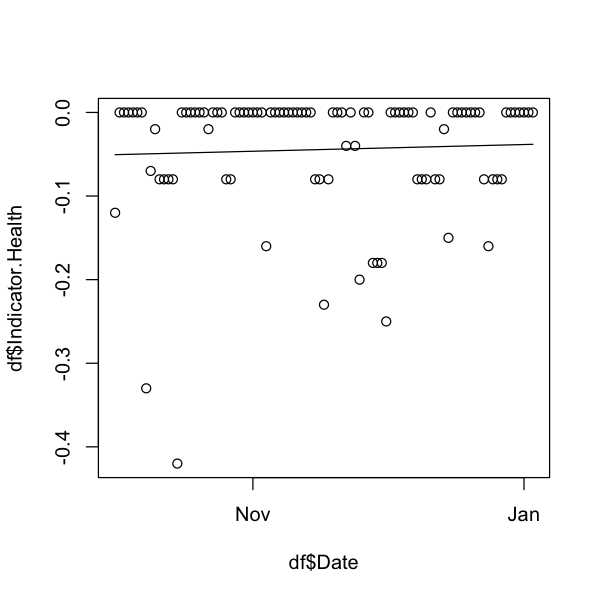

In [11]:
a_lm <- lm(Indicator.Health ~ Date, data=df)
plot(df$Date, df$Indicator.Health)
lines(df$Date, a_lm$fitted)

#### Health over time

Warning message:
“The plyr::rename operation has created duplicates for the following name(s): (`colour`)”

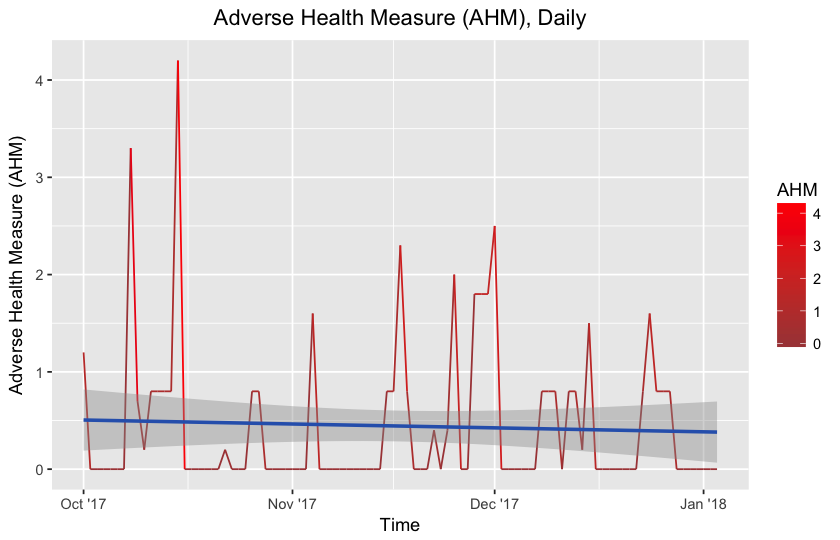

In [15]:
# For this section, I should comment out certain lines.
library(ggplot2)  # imports ggplot2
var <- df$Indicator.Health  # y-axis
time <- df$Date  # x-axis

options(repr.plot.width=7, repr.plot.height=4.5)  # Sets Jupyter Notebook plot size, inches

# aes() means "aesthetics". for y-axis, I flipped it an magnified by 10.
ggplot(data=df, aes(x=time, y=-10*(var), colour=(-10*var), color=qsec, group=1)) + 
  geom_line() + # draws line between points
#   geom_point() + # adds dots for data points
  theme(plot.title = element_text(hjust = 0.5)) + # centers title
  scale_color_gradient(low="#AA4444", high="#ff0000") + # line color, reflected by legend
  scale_x_date(date_breaks='1 month', date_labels="%b '%y") + # otherwise labels didn't show year
  stat_smooth(method='lm', col='#2e64ba') + # draws linear model, i.e. regression line with confidence bands
  labs(x='Time', y='Adverse Health Measure (AHM)', title='Adverse Health Measure (AHM), Daily', colour='AHM')

options(repr.plot.width=7, repr.plot.height=7)  # (1) Resets Jupyter Notebook plot size back to default